# Group Assignment: Titanic EDA
Name: Ben Gierhart and Luci Barnett

In this assignment, you will work in groups to explore the Titanic dataset. Follow the questions below and work together to answer each of them using `pandas`, `matplotlib`, and `seaborn` libraries. Each group is responsible for preparing a presentation summarizing the findings and visualizations.


### Titanic Dataset
https://www.kaggle.com/datasets/yasserh/titanic-dataset

## The Titanic dataset is one of the most well-known datasets for data analysis and machine learning. It provides detailed information about the passengers aboard the Titanic ship, which tragically sank during its maiden voyage in 1912. The dataset is often used to understand how different features such as gender, age, passenger class, and fare influenced a passenger's likelihood of survival. The key features in the dataset include:
### Q0. Get the informations from Kaggle
- PassengerId: Passenger ID
- Survived: Weather Survived or not: 0 = No, 1 = Yes
- Pclass: Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd
- Name: Name of the Passenger
- Sex: Gender
- Age: Age in Years
- SibSp: No. of siblings / spouses aboard the Titanic
- Parch: No. of parents / children aboard the Titanic
- Ticket: Ticket number
- Fare: Passenger fare
- Cabin: Cabin number
- Embarked: Port of Embarkation: (C = Cherbourg, Q = Queenstown, S = Southampton)

### Import Libraries and Load the Dataset

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("Titanic-Dataset.csv")

### Q1: What are the columns present in the dataset?

Hint: Use a pandas function to list the columns.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Q2: What is the structure of the dataset, and what are the datatypes of the columns?
Hint: Use the .info() method in pandas.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Q3: Provide a summary of the numerical data.
Hint: Use the .describe() function.

In [12]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Q4: Drop PassengerId, Name, Ticket, Cabin, Embarked. Why are we dropping the columns?
Hint: Use .drop() and axis=1

In [14]:
data=data.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)
data.head()
#These items are unique, and we do not want that data to influence the analysis of survival status

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


### Q5: Which columns have missing values, and how many?
Hint: Use .isnull().sum().

In [16]:
data.isnull().sum()
#Age has 177 missing values in dataset that removes the Cabin and Embarked columns

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

### Q6: How can you handle missing values in the 'Age' column?
Hint: Fill missing values with either the mean, median, or mode.

In [18]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

### Q7: What is the survival rate of passengers by gender?
Hint: Use groupby() on the "Sex" column and calculate the mean of the "Survived" column.

In [20]:
sex_survivalrate=data.groupby('Sex')['Survived'].mean()
sex_survivalrate

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

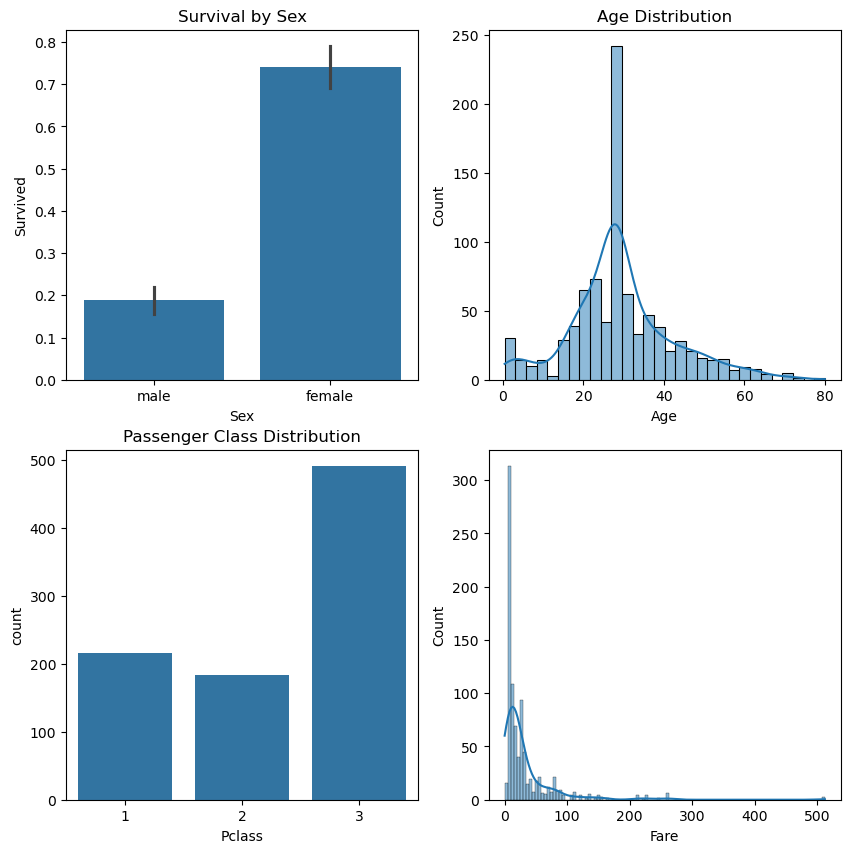

In [21]:
# First plot - Bar plot for 'sex' column

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.barplot(x='Sex', y='Survived', data=data, ax=axes[0, 0])

axes[0, 0].set_title('Survival by Sex')


# Second plot - Histogram for 'age' column

sns.histplot(data['Age'], kde=True, ax=axes[0, 1])

axes[0, 1].set_title('Age Distribution')


# Third plot - Count plot for 'class' column

sns.countplot(x='Pclass', data=data, ax=axes[1, 0])

axes[1, 0].set_title('Passenger Class Distribution')


# Fourth plot - Histogram for 'fare' column

sns.histplot(data['Fare'], kde=True, ax=axes[1, 1])

### Q8: Create a bar plot of the survival rate by gender.
Hint: Use seaborn.barplot().

Text(0.5, 1.0, 'Survival by Sex')

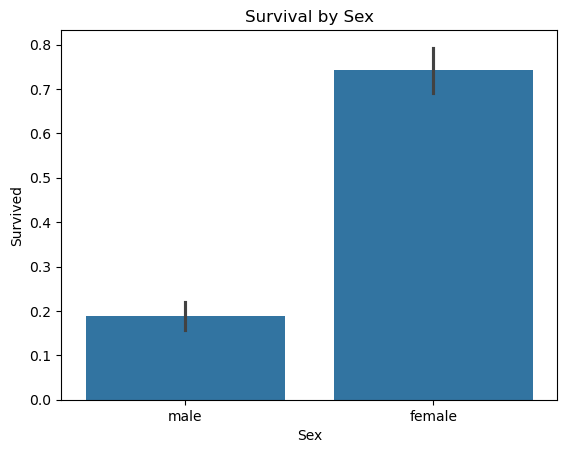

In [23]:
sns.barplot(x='Sex', y='Survived', data=data).set_title('Survival by Sex')

### Q9: How many passengers were in each class (Pclass)?
Hint: Use .value_counts() on the "Pclass" column.

In [25]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

### Q10: What is the survival rate for each passenger class?
Hint: Group by "Pclass" and calculate the mean of "Survived".

In [27]:
class_survivalrate=data.groupby('Pclass')['Survived'].mean()
class_survivalrate

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

### Q11: Create a bar plot of survival rates by passenger class.
Hint: Use seaborn.barplot().

<Axes: xlabel='Pclass', ylabel='Survived'>

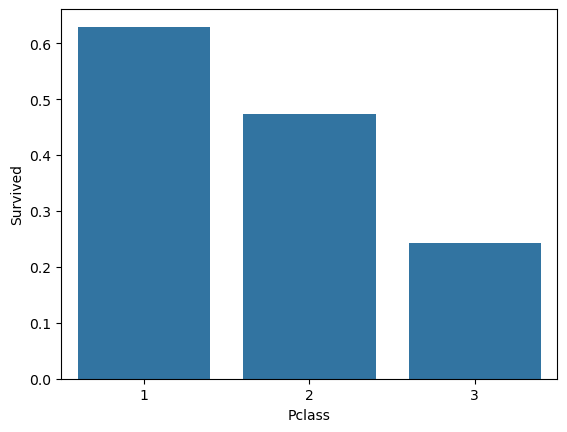

In [29]:
sns.barplot(class_survivalrate)

### Q12: Plot the distribution of the 'Age' column.
Hint: Use seaborn.histplot() to plot a histogram.

<Axes: xlabel='Age', ylabel='Count'>

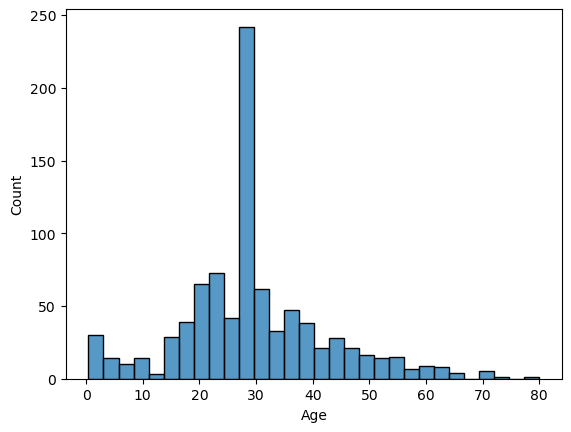

In [31]:
sns.histplot(data['Age'])

### Q13: Create a box plot comparing survival by age.
Hint: Use seaborn.boxplot() to compare the distribution of age for survivors and non-survivors.

<Axes: xlabel='Survived', ylabel='Age'>

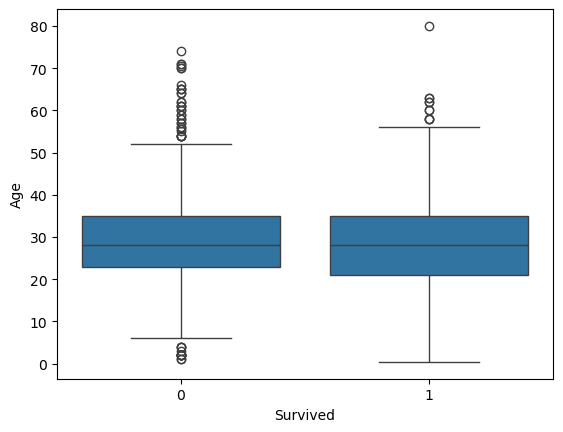

In [34]:
sns.boxplot(x='Survived', y='Age', data=data)

### Q14: Plot the distribution of the 'Fare' column.
Hint: Use seaborn.histplot().

Text(0.5, 1.0, 'Fate Distribution')

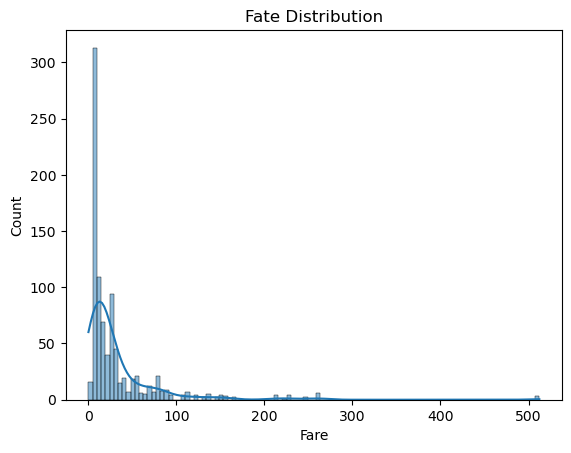

In [19]:
sns.histplot(data['Fare'], kde=True).set_title('Fate Distribution')

### Q15: What are the correlations between the numerical columns? Any pattern?
Hint: Use the .select_dtypes('number') and .corr() function and visualize the result with a heatmap.

<Axes: >

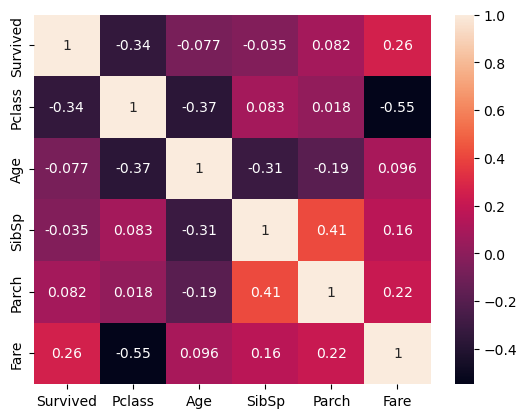

In [17]:
numerical_data=data.select_dtypes('number').corr()
numerical_data
corr_matrix=data[['Survived', 'Pclass', 'Age', 'SibSp','Parch', 'Fare']].corr()
sns.heatmap(corr_matrix, annot=True)

### Q16: Does having siblings or spouses aboard affect survival chances?
Hint: Group by the "SibSp" and Survived column.

In [36]:
SibSp_survivalrate=data.groupby('SibSp')['Survived'].mean()
SibSp_survivalrate
#Yes, the more siblings or spouses, the lower your likelihood of surviving

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

#### The changes of survival fall the larger the group.

### Q17: Create a scatter plot showing the relationship between fare and survival.
Hint: Use seaborn.scatterplot().

<Axes: xlabel='Fare', ylabel='Survived'>

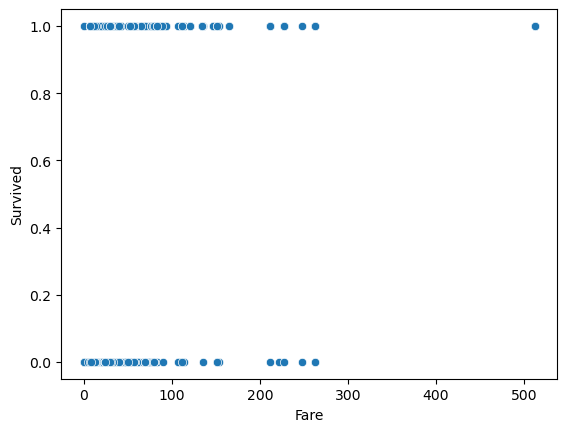

In [54]:
sns.scatterplot(data=data, x='Fare', y='Survived')

### Q18: Create a pie chart showing the distribution of passengers by class (Pclass).

Hint: Use matplotlib.pie() to create the pie chart.

<Axes: ylabel='count'>

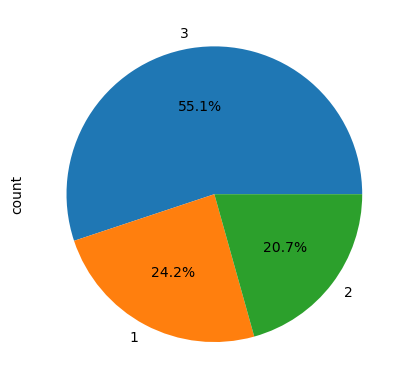

In [57]:
data['Pclass'].value_counts().plot.pie(autopct='%1.1f%%')

### Q19: Plot a line graph showing how the fare varies with the age of the passengers.

Hint: Use seaborn.lineplot() to plot the line graph.

<Axes: xlabel='Age', ylabel='Fare'>

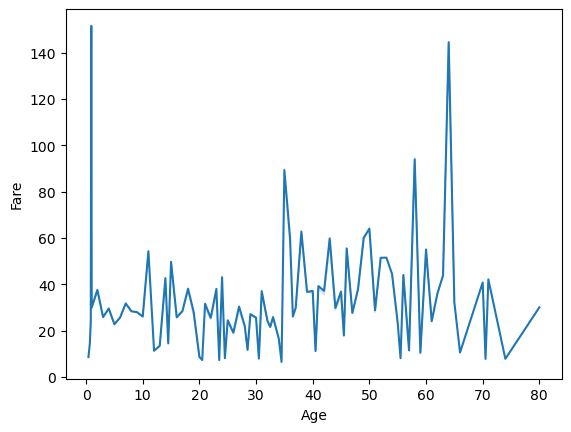

In [76]:
sns.lineplot(data=data,x='Age',y='Fare', errorbar=('ci', False))

### Q20. Create a pairplot of the numerical features (Age, Fare, SibSp, Parch) in the dataset to explore the relationships between them.

Hint: Use seaborn.pairplot() to plot pairwise relationships.

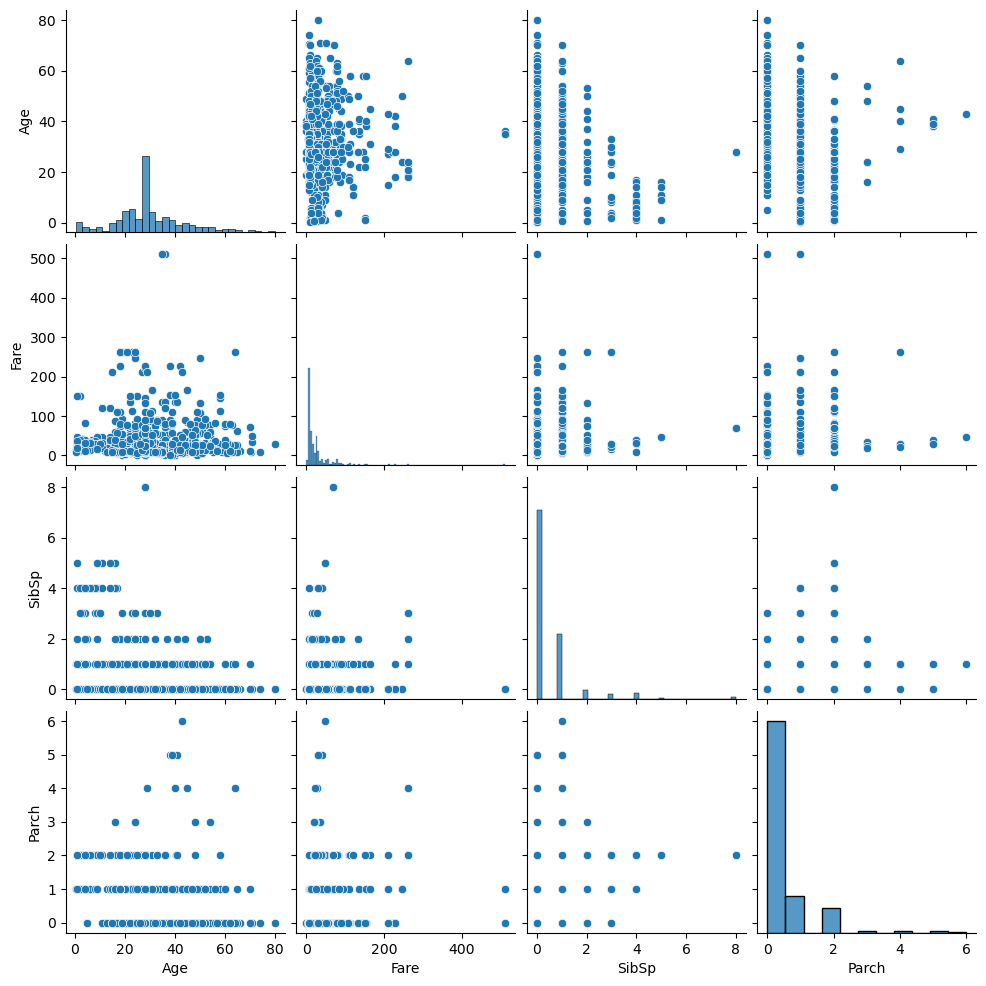

In [78]:
sns.pairplot(data, vars=['Age','Fare','SibSp','Parch'])

## Summary:  Based on the visualizations you have created so far (bar plots, histograms, scatter plots, etc.), analyze which features (such as 'Pclass', 'Sex', 'Age', and 'Fare') seem to influence the survival of passengers. What patterns can you identify from these visualizations, and which plot provided the clearest insight?

#### Gender(Sex): From the bar plot, it is clear that female passengers had a much higher rate of survival than men.
#### PassengerClass: From the bar plot, the lower your class, the less likely you were to survive.
#### Age: Age did not have a significant effect on survival based on the data.
#### Fare: Based on the scatterplot and the heat map, there doesn't appear to be strong correlation between fare and survival.

#### The bar plot of Sex vs. Survival was most clear as was the heat map. Other noticeable patterns were increased survival due to higher passenger class and also descreased survival rates with larger family size.